# RQ1: Can LLM detect bug-fix-related diffs from tangled commits?

In [ ]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd

from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from modules.Untangler import GeminiUntangler, OpenAIUntangler, FreeUntangler
from sklearn.metrics import f1_score, matthews_corrcoef, precision_score, recall_score, accuracy_score

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
df = pd.read_csv("./data/Complete_GoldSet.csv")

In [ ]:
os.makedirs("./Results/RQ1", exist_ok=True)

# Without Commit Message

In [43]:
save_path = "./Results/RQ1/WithoutMsg/"
os.makedirs(save_path, exist_ok=True)

## gpt-4o-mini

In [7]:
model_name = "gpt-4o-mini"
untangler = OpenAIUntangler(model_name, False, 0, False)
result = untangler.batch_detect(df, iteratively=False)
result.to_csv(f"{save_path}{model_name}.csv", index = False)

1776it [00:00, 8251.63it/s]
1776it [06:33,  4.51it/s]


gpt-4o-mini
Accuracy: 0.7040816326530612
Precision: 0.6601027397260274
Recall: 0.8604910714285714
F1 score: 0.747093023255814
MCC: 0.42608995006736383
              precision    recall  f1-score   support

       Buggy       0.66      0.86      0.75       896
    NotBuggy       0.79      0.54      0.64       868

    accuracy                           0.70      1764
   macro avg       0.73      0.70      0.70      1764
weighted avg       0.72      0.70      0.70      1764



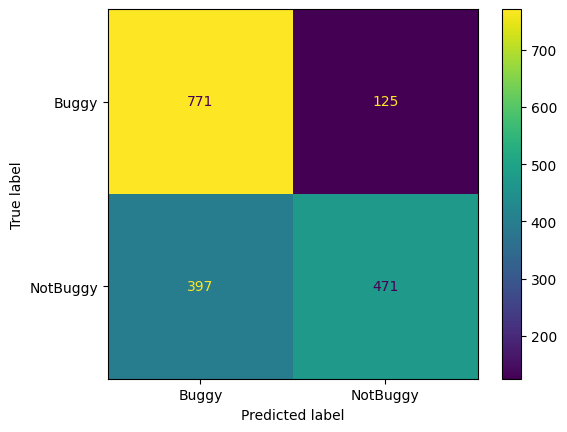

In [ ]:
model_name = "gpt-4o-mini"
result = pd.read_csv(f"{save_path}{model_name}.csv")
print(model_name)
print("Accuracy:", accuracy_score(result["Decision"], result["Detection"]))
print("Precision:", precision_score(result["Decision"], result["Detection"], pos_label="Buggy"))
print("Recall:", recall_score(result["Decision"], result["Detection"], pos_label="Buggy"))
print("F1 score:", f1_score(result["Decision"], result["Detection"], pos_label="Buggy"))
print("MCC:", matthews_corrcoef(result["Decision"], result["Detection"]))
print(classification_report(result["Decision"], result["Detection"]))
cm = confusion_matrix(result["Decision"], result["Detection"], labels=["Buggy", "NotBuggy"])
fig = ConfusionMatrixDisplay(cm, display_labels=["Buggy", "NotBuggy"])
fig.plot()

              precision    recall  f1-score   support

       Buggy       0.62      0.85      0.72       166
    NotBuggy       0.68      0.38      0.49       141

    accuracy                           0.64       307
   macro avg       0.65      0.62      0.60       307
weighted avg       0.65      0.64      0.61       307



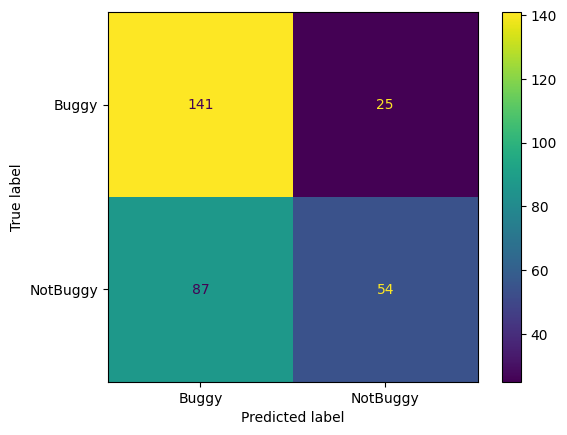

In [5]:
g = pd.read_csv("./data/GoldSet.csv")
filtered_result = result[result['CommitHash'].isin(g['CommitHash'])]
print(classification_report(filtered_result["Decision"], filtered_result["Detection"]))
cm = confusion_matrix(filtered_result["Decision"], filtered_result["Detection"], labels=["Buggy", "NotBuggy"])
fig = ConfusionMatrixDisplay(cm, display_labels=["Buggy", "NotBuggy"])
fig.plot()

## gpt-4o

In [ ]:
model_name = "gpt-4o"
untangler = OpenAIUntangler(model_name, False, 0, False)
result = untangler.batch_detect(df, iteratively=False)
result.to_csv(f"{save_path}{model_name}.csv", index = False)

In [15]:
model_name = "gpt-4o"
untangler = OpenAIUntangler(model_name, False, 0, False)
_, result = untangler.get_batch_result("batch_67e0d14e6a5c819096e8634178b16522", df)
result.to_csv(f"{save_path}{model_name}.csv", index = False)

100%|██████████| 1776/1776 [00:00<00:00, 50674040.16it/s]


In [37]:
model_name = "gpt-4o"
result = pd.read_csv(f"{save_path}{model_name}.csv")
print(model_name)
print("Accuracy:", accuracy_score(result["Decision"], result["Detection"]))
print("Precision:", precision_score(result["Decision"], result["Detection"], pos_label="Buggy"))
print("Recall:", recall_score(result["Decision"], result["Detection"], pos_label="Buggy"))
print("F1 score:", f1_score(result["Decision"], result["Detection"], pos_label="Buggy"))
print("MCC:", matthews_corrcoef(result["Decision"], result["Detection"]))
print(classification_report(result["Decision"], result["Detection"]))

gpt-4o
Accuracy: 0.6910430839002267
Precision: 0.6540825285338016
Recall: 0.8314732142857143
F1 score: 0.7321867321867321
MCC: 0.3946331473951075
              precision    recall  f1-score   support

       Buggy       0.65      0.83      0.73       896
    NotBuggy       0.76      0.55      0.63       868

    accuracy                           0.69      1764
   macro avg       0.71      0.69      0.68      1764
weighted avg       0.71      0.69      0.68      1764



              precision    recall  f1-score   support

       Buggy       0.66      0.79      0.72       166
    NotBuggy       0.68      0.52      0.59       141

    accuracy                           0.67       307
   macro avg       0.67      0.66      0.66       307
weighted avg       0.67      0.67      0.66       307



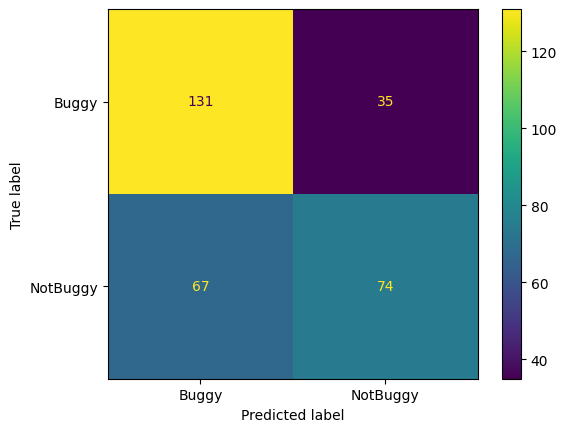

In [7]:
g = pd.read_csv("./data/GoldSet.csv")
filtered_result = result[result['CommitHash'].isin(g['CommitHash'])]
print(classification_report(filtered_result["Decision"], filtered_result["Detection"]))
cm = confusion_matrix(filtered_result["Decision"], filtered_result["Detection"], labels=["Buggy", "NotBuggy"])
fig = ConfusionMatrixDisplay(cm, display_labels=["Buggy", "NotBuggy"])
fig.plot()

## gemini-2.0-flash

In [31]:
model_name = "gemini-2.0-flash"
untangler = GeminiUntangler(model_name, False, 0, False)
result = untangler.batch_detect(df)
result["Detection"] = result["Detection"].apply(lambda x: x.strip())
result.to_csv(f"{save_path}{model_name}.csv", index = False)

1776it [14:20,  2.07it/s]


In [38]:
model_name = "gemini-2.0-flash"
result = pd.read_csv(f"{save_path}{model_name}.csv")
print(model_name)
print("Accuracy:", accuracy_score(result["Decision"], result["Detection"]))
print("Precision:", precision_score(result["Decision"], result["Detection"], pos_label="Buggy"))
print("Recall:", recall_score(result["Decision"], result["Detection"], pos_label="Buggy"))
print("F1 score:", f1_score(result["Decision"], result["Detection"], pos_label="Buggy"))
print("MCC:", matthews_corrcoef(result["Decision"], result["Detection"]))
print(classification_report(result["Decision"], result["Detection"]))

gemini-2.0-flash
Accuracy: 0.6921768707482994
Precision: 0.6502127659574468
Recall: 0.8526785714285714
F1 score: 0.7378078223080637
MCC: 0.40195592400968794
              precision    recall  f1-score   support

       Buggy       0.65      0.85      0.74       896
    NotBuggy       0.78      0.53      0.63       868

    accuracy                           0.69      1764
   macro avg       0.71      0.69      0.68      1764
weighted avg       0.71      0.69      0.68      1764



              precision    recall  f1-score   support

       Buggy       0.61      0.76      0.67       166
    NotBuggy       0.60      0.42      0.49       141

    accuracy                           0.60       307
   macro avg       0.60      0.59      0.58       307
weighted avg       0.60      0.60      0.59       307



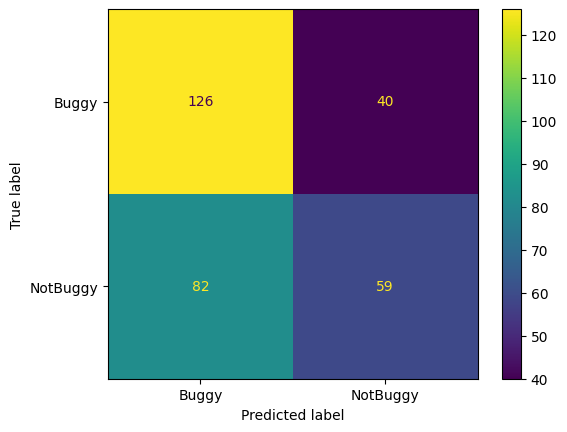

In [9]:
g = pd.read_csv("./data/GoldSet.csv")
filtered_result = result[result['CommitHash'].isin(g['CommitHash'])]
print(classification_report(filtered_result["Decision"], filtered_result["Detection"]))
cm = confusion_matrix(filtered_result["Decision"], filtered_result["Detection"], labels=["Buggy", "NotBuggy"])
fig = ConfusionMatrixDisplay(cm, display_labels=["Buggy", "NotBuggy"])
fig.plot()

## codellama/CodeLlama-7b-hf

In [ ]:
model_name = "microsoft/Phi-3-mini-4k-instruct"
untangler = FreeUntangler(model_name, False, 0, False)
result = untangler.batch_detect(df[:2])
result["Detection"] = result["Detection"].apply(lambda x: x.strip())

model_name = model_name.replace("/","-")
result.to_csv(f"{save_path}{model_name}.csv", index = False)

In [ ]:
result = pd.read_csv(f"{save_path}{model_name}.csv")
print(classification_report(result["Decision"], result["Detection"]))

In [ ]:
g = pd.read_csv("./data/GoldSet.csv")
filtered_result = result[result['CommitHash'].isin(g['CommitHash'])]
print(classification_report(filtered_result["Decision"], filtered_result["Detection"]))
cm = confusion_matrix(filtered_result["Decision"], filtered_result["Detection"], labels=["Buggy", "NotBuggy"])
fig = ConfusionMatrixDisplay(cm, display_labels=["Buggy", "NotBuggy"])
fig.plot()

# With Commit Message

In [46]:
save_path = "./Results/RQ1/WithMsg/"
os.makedirs(save_path, exist_ok=True)

In [41]:
model_name = "gpt-4o-mini"
untangler = GeminiUntangler(model_name, True, 0, False)
untangler.prepare_prompt(df["CommitMessage"].iloc[0], df["Diff"].iloc[0])
untangler.print_prompt()

Prompt for: gpt-4o-mini
Token count: <Could not count tokens>
InitialPrompt: You are a Git commit review assistant. You excel at analyzing Java source code diffs and commit messages. Given a Java source code diff and its commit message, analyze both to determine if the changes align with the commit message and indicate a bug fix. Assess the relevance between the commit message and code modifications, identifying error-handling updates, logical corrections, exception-handling improvements, and other signs of bug-related changes. Output only a single word: 'Buggy' if the changes indicate a bug fix, otherwise 'NotBuggy'.


Commit Messaage: Fix bug in GroovyTemplate convenience

It was ignoring the engine argument in the 3 arg version
of template().
Git Diff:
@@ -1,7 +1,7 @@
 	public static String template(TemplateEngine engine, String name, Map<String, ?> model)
 			throws IOException, CompilationFailedException, ClassNotFoundException {
-		Writable writable = getTemplate(name).make(model

In [40]:
model_name = "gpt-4o-mini"
untangler = OpenAIUntangler(model_name, True, 0, False)
untangler.prepare_prompt(df["CommitMessage"].iloc[0], df["Diff"].iloc[0])
untangler.print_prompt()

Prompt for: gpt-4o-mini
Token count: 235
InitialPrompt: You are a Git commit review assistant. You excel at analyzing Java source code diffs and commit messages. Given a Java source code diff and its commit message, analyze both to determine if the changes align with the commit message and indicate a bug fix. Assess the relevance between the commit message and code modifications, identifying error-handling updates, logical corrections, exception-handling improvements, and other signs of bug-related changes. Output only a single word: 'Buggy' if the changes indicate a bug fix, otherwise 'NotBuggy'.

[{'role': 'developer', 'content': "You are a Git commit review assistant. You excel at analyzing Java source code diffs and commit messages. Given a Java source code diff and its commit message, analyze both to determine if the changes align with the commit message and indicate a bug fix. Assess the relevance between the commit message and code modifications, identifying error-handling updat

## gpt-4o-mini

In [ ]:
model_name = "gpt-4o-mini"
untangler = OpenAIUntangler(model_name, True, 0, False)
result = untangler.batch_detect(df, iteratively=False)
result.to_csv(f"{save_path}{model_name}.csv", index = False)

In [26]:
model_name = "gpt-4o-mini"
untangler = OpenAIUntangler(model_name, True, 0, False)
_, result = untangler.get_batch_result("batch_67e0d76dce348190a7ba8c8c1a2428fb", df)
result.to_csv(f"{save_path}{model_name}.csv", index = False)

100%|██████████| 1776/1776 [00:00<?, ?it/s]


gpt-4o-mini
Accuracy: 0.8219954648526077
Precision: 0.7635869565217391
Recall: 0.9408482142857143
F1 score: 0.843
MCC: 0.6613690103787445
              precision    recall  f1-score   support

       Buggy       0.76      0.94      0.84       896
    NotBuggy       0.92      0.70      0.79       868

    accuracy                           0.82      1764
   macro avg       0.84      0.82      0.82      1764
weighted avg       0.84      0.82      0.82      1764



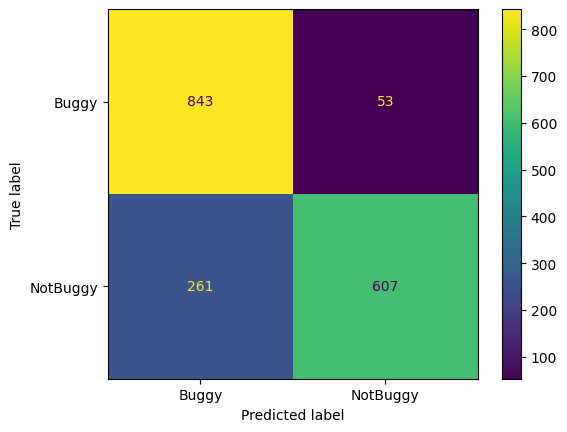

In [47]:
model_name = "gpt-4o-mini"
result = pd.read_csv(f"{save_path}{model_name}.csv")
print(model_name)
print("Accuracy:", accuracy_score(result["Decision"], result["Detection"]))
print("Precision:", precision_score(result["Decision"], result["Detection"], pos_label="Buggy"))
print("Recall:", recall_score(result["Decision"], result["Detection"], pos_label="Buggy"))
print("F1 score:", f1_score(result["Decision"], result["Detection"], pos_label="Buggy"))
print("MCC:", matthews_corrcoef(result["Decision"], result["Detection"]))
print(classification_report(result["Decision"], result["Detection"]))
cm = confusion_matrix(result["Decision"], result["Detection"], labels=["Buggy", "NotBuggy"])
fig = ConfusionMatrixDisplay(cm, display_labels=["Buggy", "NotBuggy"])
fig.plot()

              precision    recall  f1-score   support

       Buggy       0.65      0.96      0.77       166
    NotBuggy       0.90      0.38      0.54       141

    accuracy                           0.70       307
   macro avg       0.77      0.67      0.66       307
weighted avg       0.76      0.70      0.67       307



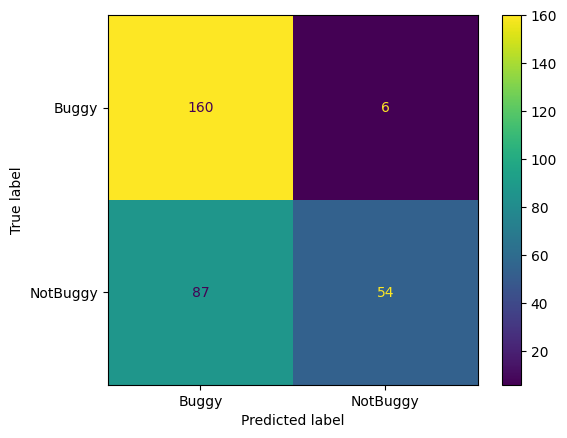

In [25]:
g = pd.read_csv("./data/GoldSet.csv")
filtered_result = result[result['CommitHash'].isin(g['CommitHash'])]
print(classification_report(filtered_result["Decision"], filtered_result["Detection"]))
cm = confusion_matrix(filtered_result["Decision"], filtered_result["Detection"], labels=["Buggy", "NotBuggy"])
fig = ConfusionMatrixDisplay(cm, display_labels=["Buggy", "NotBuggy"])
fig.plot()

## gpt-4o

In [ ]:
model_name = "gpt-4o"
untangler = OpenAIUntangler(model_name, True, 0, False)
result = untangler.batch_detect(df, iteratively=False)
result.to_csv(f"{save_path}{model_name}.csv", index = False)

In [23]:
model_name = "gpt-4o"
untangler = OpenAIUntangler(model_name, True, 0, False)
_, result = untangler.get_batch_result("batch_67e0d7c3a0c08190be77aaa2b3ef40e2", df)
result.to_csv(f"{save_path}{model_name}.csv", index = False)

100%|██████████| 1776/1776 [00:00<00:00, 31970317.18it/s]


In [48]:
model_name = "gpt-4o"
result = pd.read_csv(f"{save_path}{model_name}.csv")
print(model_name)
print("Accuracy:", accuracy_score(result["Decision"], result["Detection"]))
print("Precision:", precision_score(result["Decision"], result["Detection"], pos_label="Buggy"))
print("Recall:", recall_score(result["Decision"], result["Detection"], pos_label="Buggy"))
print("F1 score:", f1_score(result["Decision"], result["Detection"], pos_label="Buggy"))
print("MCC:", matthews_corrcoef(result["Decision"], result["Detection"]))
print(classification_report(result["Decision"], result["Detection"]))

gpt-4o
Accuracy: 0.8735827664399093
Precision: 0.8677595628415301
Recall: 0.8861607142857143
F1 score: 0.8768636112644947
MCC: 0.7471888830776973
              precision    recall  f1-score   support

       Buggy       0.87      0.89      0.88       896
    NotBuggy       0.88      0.86      0.87       868

    accuracy                           0.87      1764
   macro avg       0.87      0.87      0.87      1764
weighted avg       0.87      0.87      0.87      1764



              precision    recall  f1-score   support

       Buggy       0.72      0.90      0.80       166
    NotBuggy       0.84      0.60      0.70       141

    accuracy                           0.76       307
   macro avg       0.78      0.75      0.75       307
weighted avg       0.78      0.76      0.76       307



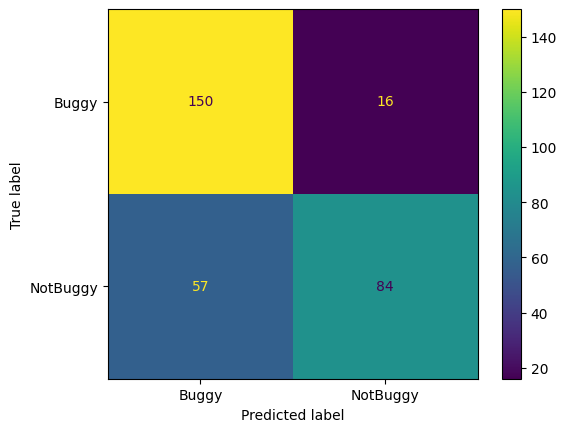

In [27]:
g = pd.read_csv("./data/GoldSet.csv")
filtered_result = result[result['CommitHash'].isin(g['CommitHash'])]
print(classification_report(filtered_result["Decision"], filtered_result["Detection"]))
cm = confusion_matrix(filtered_result["Decision"], filtered_result["Detection"], labels=["Buggy", "NotBuggy"])
fig = ConfusionMatrixDisplay(cm, display_labels=["Buggy", "NotBuggy"])
fig.plot()

## gemini-2.0-flash

In [16]:
model_name = "gemini-2.0-flash"
untangler = GeminiUntangler(model_name, True, 0, False)
result = untangler.batch_detect(df)
result["Detection"] = result["Detection"].apply(lambda x: x.strip())
result.to_csv(f"{save_path}{model_name}.csv", index = False)

1776it [15:47,  1.87it/s]


In [49]:
model_name = "gemini-2.0-flash"
result = pd.read_csv(f"{save_path}{model_name}.csv")
print(model_name)
print("Accuracy:", accuracy_score(result["Decision"], result["Detection"]))
print("Precision:", precision_score(result["Decision"], result["Detection"], pos_label="Buggy"))
print("Recall:", recall_score(result["Decision"], result["Detection"], pos_label="Buggy"))
print("F1 score:", f1_score(result["Decision"], result["Detection"], pos_label="Buggy"))
print("MCC:", matthews_corrcoef(result["Decision"], result["Detection"]))
print(classification_report(result["Decision"], result["Detection"]))

gemini-2.0-flash
Accuracy: 0.7959183673469388
Precision: 0.7171799027552674
Recall: 0.9877232142857143
F1 score: 0.8309859154929577
MCC: 0.6386399995292331
              precision    recall  f1-score   support

       Buggy       0.72      0.99      0.83       896
    NotBuggy       0.98      0.60      0.74       868

    accuracy                           0.80      1764
   macro avg       0.85      0.79      0.79      1764
weighted avg       0.85      0.80      0.79      1764



              precision    recall  f1-score   support

       Buggy       0.58      1.00      0.74       166
    NotBuggy       1.00      0.16      0.28       141

    accuracy                           0.62       307
   macro avg       0.79      0.58      0.51       307
weighted avg       0.78      0.62      0.53       307



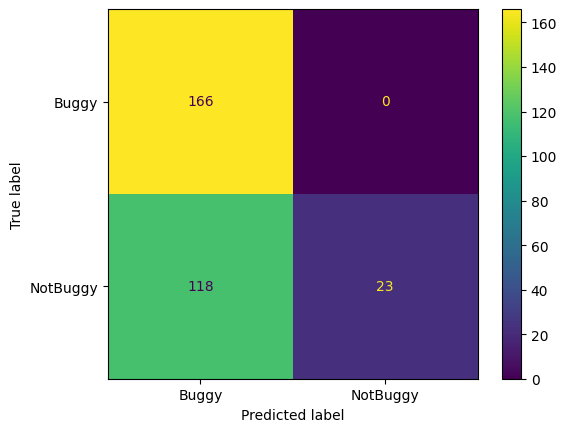

In [29]:
g = pd.read_csv("./data/GoldSet.csv")
filtered_result = result[result['CommitHash'].isin(g['CommitHash'])]
print(classification_report(filtered_result["Decision"], filtered_result["Detection"]))
cm = confusion_matrix(filtered_result["Decision"], filtered_result["Detection"], labels=["Buggy", "NotBuggy"])
fig = ConfusionMatrixDisplay(cm, display_labels=["Buggy", "NotBuggy"])
fig.plot()

## codellama/CodeLlama-7b-hf

In [ ]:
model_name = "microsoft/Phi-3-mini-4k-instruct"
untangler = FreeUntangler(model_name, True, 0, False)
result = untangler.batch_detect(df[:2])
result["Detection"] = result["Detection"].apply(lambda x: x.strip())

model_name = model_name.replace("/","-")
result.to_csv(f"{save_path}{model_name}.csv", index = False)

In [ ]:
result = pd.read_csv(f"{save_path}{model_name}.csv")
print(classification_report(result["Decision"], result["Detection"]))

In [ ]:
g = pd.read_csv("./data/GoldSet.csv")
filtered_result = result[result['CommitHash'].isin(g['CommitHash'])]
print(classification_report(filtered_result["Decision"], filtered_result["Detection"]))
cm = confusion_matrix(filtered_result["Decision"], filtered_result["Detection"], labels=["Buggy", "NotBuggy"])
fig = ConfusionMatrixDisplay(cm, display_labels=["Buggy", "NotBuggy"])
fig.plot()